<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_w10_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import NumPy library
import numpy as np
# Import Pandas library
import pandas as pd
# Load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

In [2]:

# Importing CSV with data and assigning it to the name Airlines
Airlines = pd.read_csv('https://raw.githubusercontent.com/Danjstr/AIM-5001/master/airlines.csv') 

# Print table
Airlines

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [3]:
Airlines=Airlines.rename(columns={"Unnamed: 0": "States", "Unnamed: 1": "on_Time_or_delayed"})

Airlines

,States,on_Time_or_delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [4]:
Airlines=Airlines.dropna(how='all') 

Airlines

,States,on_Time_or_delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [5]:
Airelines=Airlines.ffill()

Airelines

,States,on_Time_or_delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [6]:
melted = pd.melt(Airelines, ['States','on_Time_or_delayed'])

melted

,States,on_Time_or_delayed,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [7]:
melted=melted.rename(columns={'variable':'City'	,'value':'Number_of_flights'})

melted.head()

,States,on_Time_or_delayed,City,Number_of_flights
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0


**Using your reshaped/transformed data, perform analysis to compare the arrival delays for the
two airlines**

For each city, which airline had the best on time performance?


In [13]:
Pivot = melted.pivot_table(index=['States','City'],
                             columns='on_Time_or_delayed',
                             values='Number_of_flights')

In [16]:
Pivot

on_Time_or_delayed     delayed  on time
States  City                           
ALASKA  Los Angeles       62.0    497.0
        Phoenix           12.0    221.0
        San Diego         20.0    212.0
        San Francisco    102.0    503.0
        Seattle          305.0   1841.0
AM WEST Los Angeles      117.0    694.0
        Phoenix          415.0   4840.0
        San Diego         65.0    383.0
        San Francisco    129.0    320.0
        Seattle           61.0    201.0

In [19]:
pivot=Pivot.sort_values('City')
pivot

,on_Time_or_delayed,delayed,on time
States,City,,
ALASKA,Los Angeles,62.0,497.0
AM WEST,Los Angeles,117.0,694.0
ALASKA,Phoenix,12.0,221.0
AM WEST,Phoenix,415.0,4840.0
ALASKA,San Diego,20.0,212.0
AM WEST,San Diego,65.0,383.0
ALASKA,San Francisco,102.0,503.0
AM WEST,San Francisco,129.0,320.0
ALASKA,Seattle,305.0,1841.0


In [27]:
pivot['Percent_on_time'] = pivot['on time']/pivot["on time"] + pivot["delayed"]

pivot

,on_Time_or_delayed,delayed,on time,Percent_on_time
States,City,,,
ALASKA,Los Angeles,62.0,497.0,63.0
AM WEST,Los Angeles,117.0,694.0,118.0
ALASKA,Phoenix,12.0,221.0,13.0
AM WEST,Phoenix,415.0,4840.0,416.0
ALASKA,San Diego,20.0,212.0,21.0
AM WEST,San Diego,65.0,383.0,66.0
ALASKA,San Francisco,102.0,503.0,103.0
AM WEST,San Francisco,129.0,320.0,130.0
ALASKA,Seattle,305.0,1841.0,306.0


In [10]:
A1["xlabel"] = A1["States"].astype(str) + str(' - ') + A1["City"].astype(str)
A1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,States,on_Time_or_delayed,City,Number_of_flights,xlabel
0,ALASKA,on time,Los Angeles,497.0,ALASKA - Los Angeles
2,AM WEST,on time,Los Angeles,694.0,AM WEST - Los Angeles
4,ALASKA,on time,Phoenix,221.0,ALASKA - Phoenix
6,AM WEST,on time,Phoenix,4840.0,AM WEST - Phoenix
8,ALASKA,on time,San Diego,212.0,ALASKA - San Diego
10,AM WEST,on time,San Diego,383.0,AM WEST - San Diego
12,ALASKA,on time,San Francisco,503.0,ALASKA - San Francisco
14,AM WEST,on time,San Francisco,320.0,AM WEST - San Francisco
16,ALASKA,on time,Seattle,1841.0,ALASKA - Seattle
18,AM WEST,on time,Seattle,201.0,AM WEST - Seattle


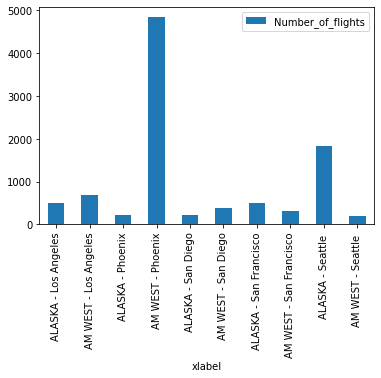

In [11]:
A1.plot.bar(x='xlabel', y='Number_of_flights')


Which airline had the best overall on time performance?